### Nombre: Jorge Arévalo
### Docente: Ing. Diego Quisi
### Materia: Simulación

# Introducción

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook) [1].

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].


# Enunciado:

Diseñe y desarrolle un modelo y/o script que permita simular el siguiente caso real:

Obtener datos de tendencia de twitter o facebook, para ello se puede obtener a través del API [4].

*	Title: Titulo del Post/Twitter
*	Word count: la cantidad de palabras del artículo,
*	#of Links: los enlaces externos que contiene,
*	#of comments: cantidad de comentarios,
*	#Shares: compartidos.
*	HashTag
*	Etc.

# Solución

In [97]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from facebook_scraper import get_posts
import numpy as np
import seaborn as sb
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [98]:
def fun(texto):
    cuenta=0
    for carac in texto:        
            cuenta = cuenta + 1
    return cuenta

In [99]:
posts = []

for post in get_posts('estebanalbornozv ', pages=10):
    post['numWord']=fun(post['text'])  
    posts.append(post)
    
for post in get_posts('GloriaAstudilloLoor', pages=10):
    post['numWord']=fun(post['text'])    
    posts.append(post)
    
fb_posts = pd.DataFrame(posts)

In [101]:
file = open("dato.txt","w") 
for like in fb_posts['shares']:
    file.write(str(like)+'\n')
file.close()
fb_posts.describe()

,likes,comments,shares,numWord
count,76.000000,76.000000,76.000000,76.000000
mean,7.039474,0.276316,0.105263,290.868421
std,5.084462,0.960537,0.449561,246.061312
min,1.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000,195.500000
50%,6.000000,0.000000,0.000000,250.500000
75%,10.000000,0.000000,0.000000,283.250000
max,28.000000,6.000000,2.000000,1932.000000


In [102]:
fb_posts.head()

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,numWord
0,1715171395311281,Culmina una exitosa semana de actividades en l...,Culmina una exitosa semana de actividades en l...,,2020-12-20 16:38:20,None,https://video.fcue6-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue6-1.fna.fbcdn.net/v/t15.5...,720413255039668,6,0,0,https://facebook.com/watch?v=720413255039668,None,605514676276964,[],229
1,1713716165456804,Fructífero diálogo con el medio de comunicació...,Fructífero diálogo con el medio de comunicació...,,2020-12-18 22:51:40,https://scontent.fcue6-1.fna.fbcdn.net/v/t1.0-...,None,None,None,12,0,0,https://facebook.com/story.php?story_fbid=1713...,https://youtu.be/_nAgYrW--uU,605514676276964,[https://scontent.fcue6-1.fna.fbcdn.net/v/t1.0...,154
2,1713236138838140,"Desde la @DesarrolloEcAN, hemos entregado al p...","Desde la @DesarrolloEcAN, hemos entregado al p...",,2020-12-18 09:45:57,None,https://video.fcue6-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue6-1.fna.fbcdn.net/v/t15.5...,3084454858322057,6,0,0,https://facebook.com/watch?v=3084454858322057,None,605514676276964,[],236
3,1712738782221209,La #LeyPlásticosUnSoloUso nace de la necesidad...,La #LeyPlásticosUnSoloUso nace de la necesidad...,,2020-12-17 18:31:15,None,https://video.fcue6-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue6-1.fna.fbcdn.net/v/t15.5...,3602259463204263,5,0,0,https://facebook.com/watch?v=3602259463204263,None,605514676276964,[],266
4,1711696088992145,La #LeyPlásticosUnSoloUso establece obligacion...,La #LeyPlásticosUnSoloUso establece obligacion...,,2020-12-16 10:58:00,None,https://video.fcue6-1.fna.fbcdn.net/v/t42.1790...,https://scontent.fcue6-1.fna.fbcdn.net/v/t15.5...,836897457145876,2,0,0,https://facebook.com/watch?v=836897457145876,None,605514676276964,[],274


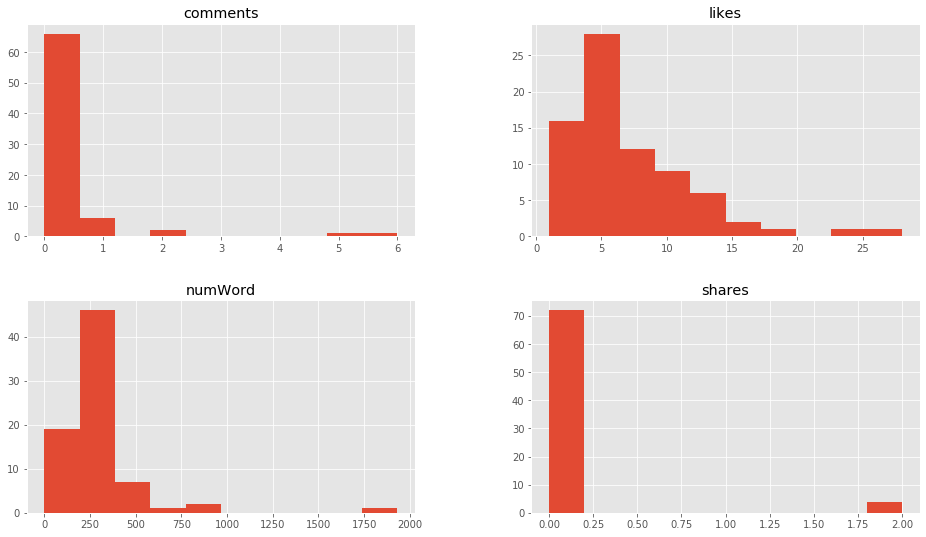

In [103]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

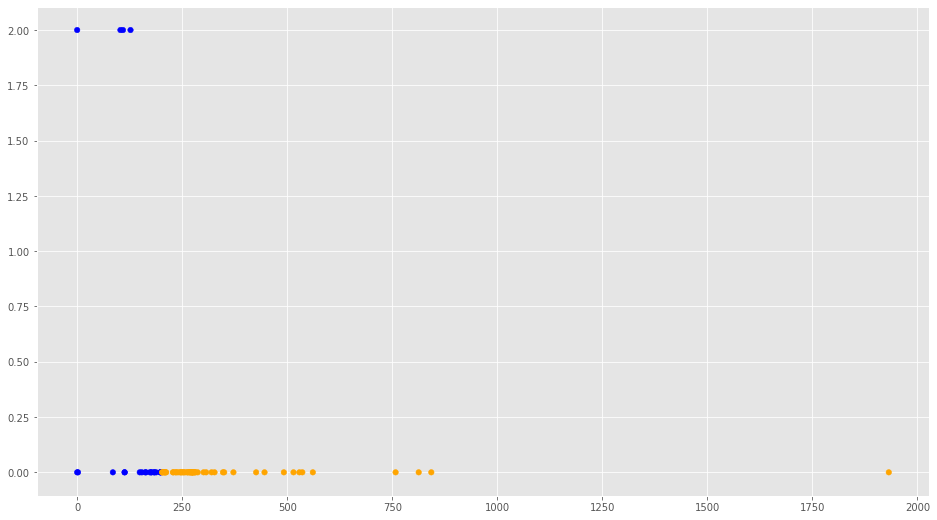

In [104]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

filtered_data = fb_posts[(fb_posts['numWord'] <= 3500) & (fb_posts['shares'] <= 80000)]

f1 = filtered_data['numWord'].values
f2 = filtered_data['shares'].values

asignar=[]
for index, row in filtered_data.iterrows():
    if(row['numWord']>200):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

Coefficients: 
 [-0.00036313]
Independent term: 
 0.21088541264684996
Mean squared error: 0.19
Variance score: 0.04


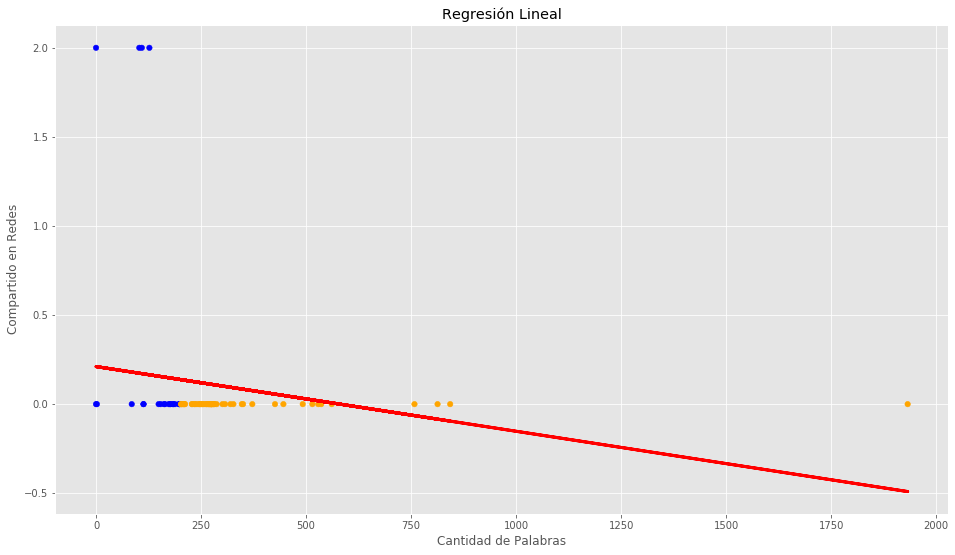

In [105]:

# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["numWord"]]
X_train = np.array(dataX)
y_train = filtered_data['shares'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(y_train, y_pred))


#Visualizamos la recta que se obtuvo
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

In [106]:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

0


In [107]:
suma = (filtered_data["likes"] + filtered_data['comments'].fillna(0))

dataX2 =pd.DataFrame()
dataX2["numWord"] = filtered_data["numWord"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['shares'].values

In [108]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [-0.0003873   0.00950019]
Mean squared error: 0.19
Variance score: 0.05


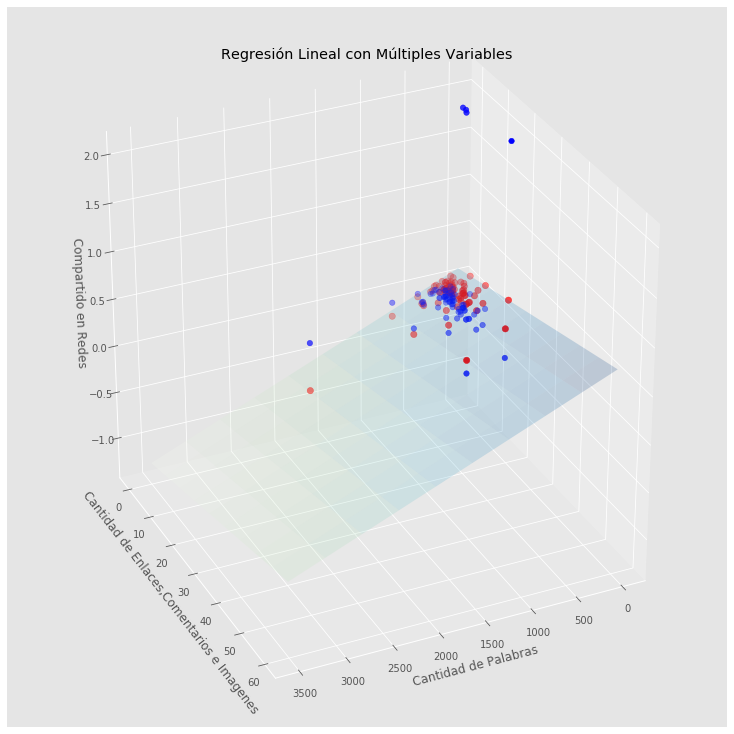

In [109]:
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
 
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
 
# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 
 
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)
 
# Graficamos el plano

ax.plot_surface(xx, yy, z, alpha=0.2, cmap='GnBu',)

 
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)
 
# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)
 
# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')
plt.show()

In [110]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

0


Simulacion con  0
Simulacion con  100
Simulacion con  200
Simulacion con  300
Simulacion con  400
Simulacion con  500
Simulacion con  600
Simulacion con  700
Simulacion con  800
Simulacion con  900
Esteban Albornoz V gana con el: 28.875 %
Gloria Astudillo Loor gana con el: 69.4875 %


In [112]:
import simpy
import random
import matplotlib.pyplot as pp
import random

%matplotlib inline

MAXIMO_VOTANTES = 50
NUMERO_MESAS = 3
TIEMPO_VOTACION = 10
TIEMPO_LLEGADA = 5
TIEMPO_SIMULACION = 50

votos = {}

class Lugar_Votacion():

    def __init__(self, environment, numero_mesas, tiempo_votacion):
        self.env = environment
        self.mesa = simpy.Resource(environment, numero_mesas)
        self.tiempo_votacion = tiempo_votacion

    def atender_votante(self, votante):
        yield self.env.timeout(random.randint(TIEMPO_VOTACION - 5, TIEMPO_VOTACION + 5))

def llegada_votante(env, nombre, Lugar_Votacion):
    print('El %s llega' % (nombre))
    with Lugar_Votacion.mesa.request() as maquina:
        yield maquina
        print('El %s ingresa' % (nombre))
        yield env.process(Lugar_Votacion.atender_votante(nombre))
        print('EL %s entra'%(nombre))
        print('El %s recibe su certificado de votación.'%(nombre))
        print('El %s sale del Recinto Electoral.'%(nombre))
        votos[nombre] = random.randint(1, 3)


def simular(env, mesas, tiempo_votacion, intervalo):
    lugar = Lugar_Votacion(env, mesas, tiempo_votacion)
    for i in range(3):
        env.process(llegada_votante(env, 'votante %d' % (i + 1), lugar))
    while True:
        yield env.timeout(random.randint(intervalo - 3, intervalo + 3))
        i += 1
        env.process(llegada_votante(env, 'votante %d' % (i + 1), lugar))


print('Lugar de votación')

env = simpy.Environment()
env.process(simular(env, NUMERO_MESAS, TIEMPO_VOTACION, TIEMPO_LLEGADA))
env.run(until=TIEMPO_SIMULACION)

print("Descripción de votos")
print(votos)

Lugar de votación
El votante 1 llega
El votante 2 llega
El votante 3 llega
El votante 1 ingresa
El votante 2 ingresa
El votante 3 ingresa
EL votante 1 entra
El votante 1 recibe su certificado de votación.
El votante 1 sale del Recinto Electoral.
El votante 4 llega
El votante 4 ingresa
EL votante 3 entra
El votante 3 recibe su certificado de votación.
El votante 3 sale del Recinto Electoral.
El votante 5 llega
EL votante 2 entra
El votante 2 recibe su certificado de votación.
El votante 2 sale del Recinto Electoral.
El votante 5 ingresa
EL votante 4 entra
El votante 4 recibe su certificado de votación.
El votante 4 sale del Recinto Electoral.
El votante 6 llega
El votante 6 ingresa
El votante 7 llega
El votante 7 ingresa
EL votante 5 entra
El votante 5 recibe su certificado de votación.
El votante 5 sale del Recinto Electoral.
El votante 8 llega
El votante 8 ingresa
EL votante 6 entra
El votante 6 recibe su certificado de votación.
El votante 6 sale del Recinto Electoral.
EL votante 7 e

# Conclusiones

Con las regresiones se puede pronosticar datos fiables para tomar decisiones y tener posibles deciciones. Con este sistema podemos aplicar las soluciones y solucionar problemas que se pueda tener. En tiempo de elecciones se puede sacar una predicción del candidato que tiene más probabilidad de ganar las elecciones. 

# Referencias

* [1]: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6291769/
* [2]: https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/
* [3]: https://eprints.ucm.es/48804/1/TFM%20Manuel%20Alejandro%20Rodriguez%20Santana.pdf
* [4]: http://opac.pucv.cl/pucv_txt/txt-8000/UCC8094_01.pdf